<a href="https://colab.research.google.com/github/mmdhirazz7/Helloworld/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('./50_Startups.csv')
df.head()

In [ ]:
# df = df.drop(df.where(df["Marketing Spend"] == 0.00, axis=1))
df = df[df["Marketing Spend"] != 0]
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1])
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

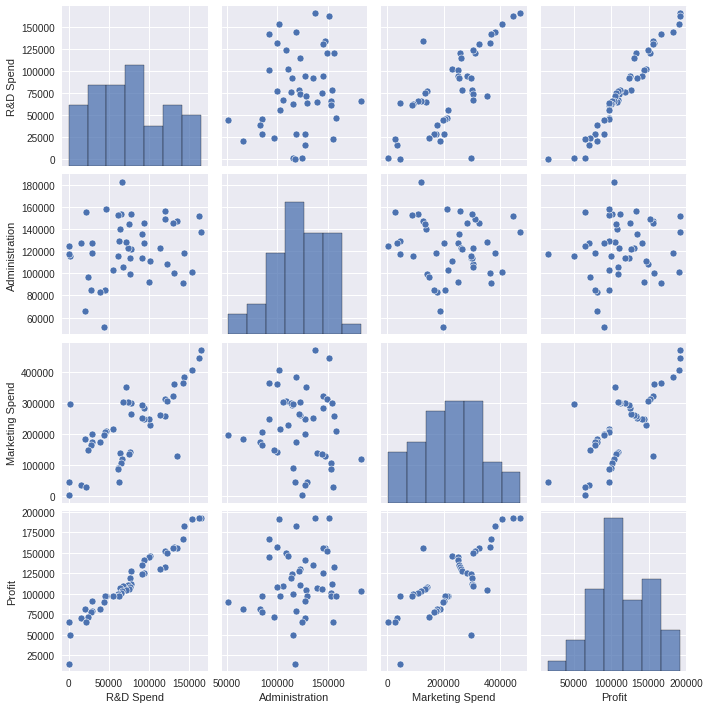

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.8854602628257932

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
s_AdaBoostRegressor = r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

In [ ]:
newdf1 = pd.DataFrame(X_train)
newdf1[3] = y_train
newdf1.columns = df.columns

In [ ]:
newdf2 = pd.DataFrame(X_test)
newdf2[3] = y_test
newdf2.columns = df.columns
newdf2['Predicted Profit'] = y_pred
newdf2.head()

,R&D Spend,Administration,Marketing Spend,Profit,Predicted Profit
0,91749.16,114175.79,294919.57,124266.90,131590.1700
1,114523.61,122616.84,261776.23,129917.04,135656.6280
2,46014.02,85047.44,205517.64,96479.51,93716.0225
3,100671.96,91790.61,249744.55,144259.40,140906.8025
4,91992.39,135495.07,252664.93,134307.35,135423.9720


In [ ]:
newdf = pd.concat([newdf1, newdf2])
newdf.tail()

,R&D Spend,Administration,Marketing Spend,Profit,Predicted Profit
5,76253.86,113867.30,298664.47,118474.03,107431.446667
6,78389.47,153773.43,299737.29,111313.02,128862.836667
7,142107.34,91391.77,366168.42,166187.94,156773.967500
8,27892.92,84710.77,164470.71,77798.83,84405.601429
9,61994.48,115641.28,91131.24,99937.59,101322.716667


In [ ]:
def plotter(model_name):
    plt.title(f"Model = {model_name}")
    plt.scatter(newdf["R&D Spend"], newdf["Profit"], label = 'True Profit')
    plt.scatter(newdf["R&D Spend"], newdf["Predicted Profit"], label = 'Predicted Profit')
    plt.xlabel('R&D Spend')
    plt.ylabel("Profit")
    plt.show()
    plt.scatter(newdf["Marketing Spend"], newdf["Profit"], label = 'True Profit')
    plt.scatter(newdf["Marketing Spend"], newdf["Predicted Profit"], label = 'Predicted Profit')
    plt.xlabel('Marketing Spend')
    plt.ylabel("Profit")
    plt.show()
    plt.scatter(newdf["Administration"], newdf["Profit"], label = 'True Profit')
    plt.scatter(newdf["Administration"], newdf["Predicted Profit"], label = 'Predicted Profit')
    plt.xlabel('MArketing Spend')
    plt.ylabel("Profit")
    plt.show()

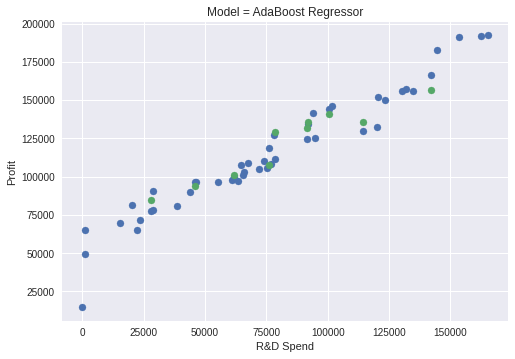

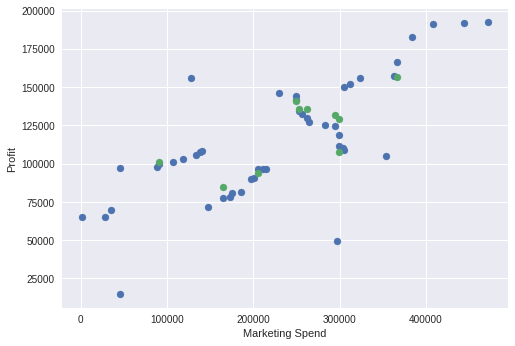

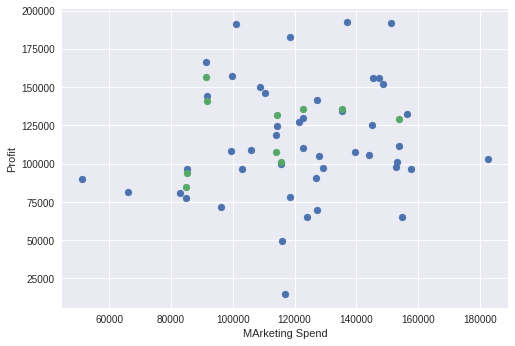

In [ ]:
plotter("AdaBoost Regressor")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
s_DecisionTreeRegressor = r2_score(y_test, y_pred1), mean_squared_error(y_test, y_pred1)
s_DecisionTreeRegressor

(0.8796304078151582, 70496595.02463989)

In [ ]:
newdf2["Predicted Profit"] = y_pred1
newdf = pd.concat([newdf1, newdf2])

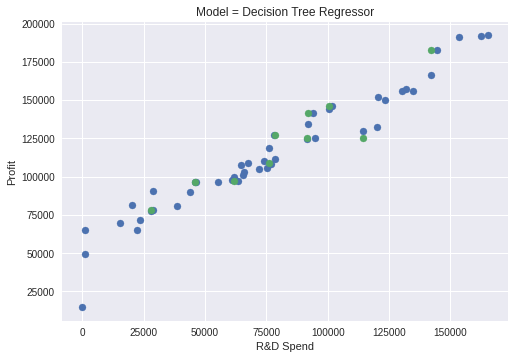

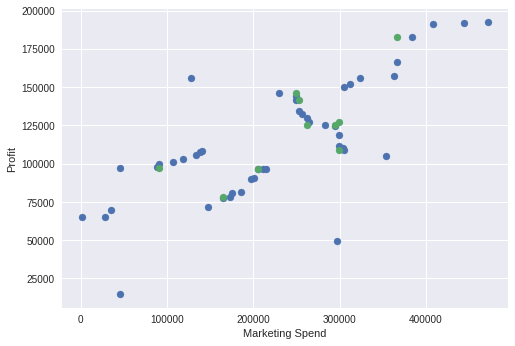

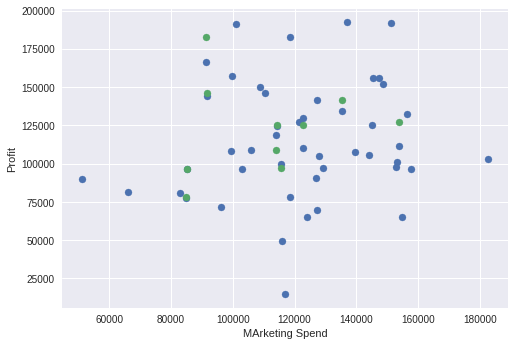

In [ ]:
plotter("Decision Tree Regressor")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred2 = model.predict(X_test)
s_RandomForest = r2_score(y_test, y_pred2), mean_squared_error(y_test, y_pred2)

In [ ]:
newdf2["Predicted Profit"] = y_pred2
newdf = pd.concat([newdf1, newdf2])

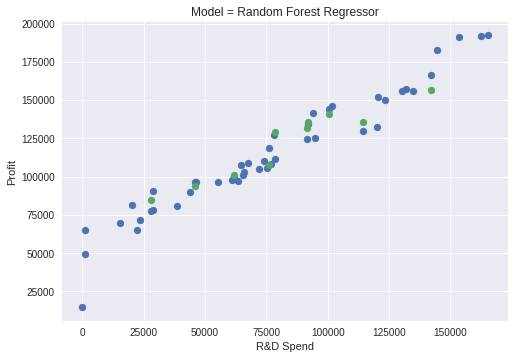

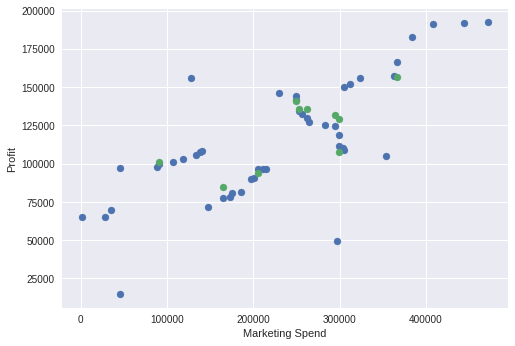

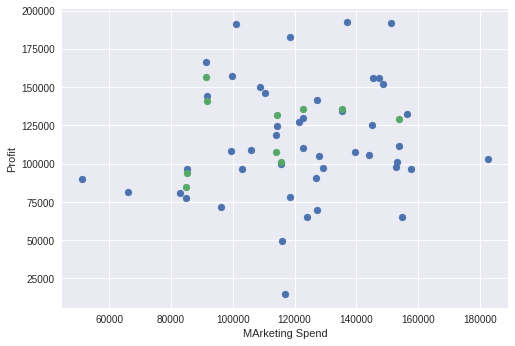

In [ ]:
plotter("Random Forest Regressor")

In [ ]:
from sklearn.svm import SVR
model3 = SVR(kernel='linear')
model3.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred3 = model3.predict(X_test)
s_SVR = r2_score(y_test, y_pred3), mean_squared_error(y_test, y_pred3)
s_SVR

(0.7794115158231105, 129191573.66785257)

In [ ]:
newdf2["Predicted Profit"] = y_pred3
newdf = pd.concat([newdf1, newdf2])

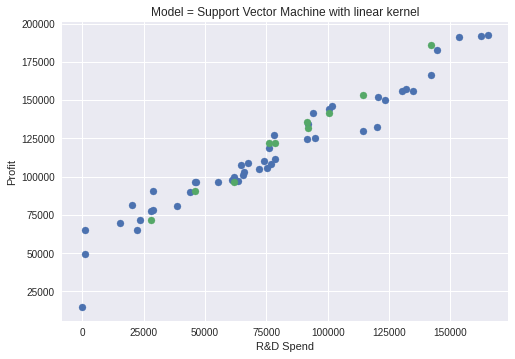

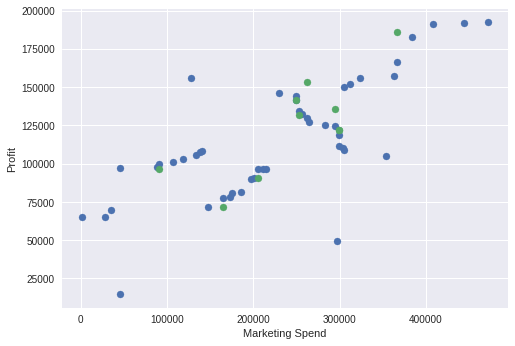

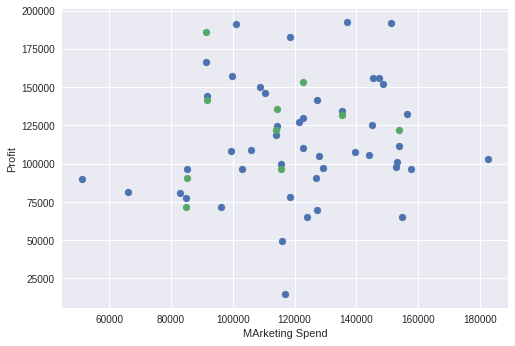

In [ ]:
plotter("Support Vector Machine with linear kernel")

In [ ]:
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred4 = model4.predict(X_test)
s_LinearRegression = r2_score(y_test, y_pred4), mean_squared_error(y_test, y_pred4)
s_LinearRegression

(0.9111588954453084, 52031374.83191113)

In [ ]:
newdf2["Predicted Profit"] = y_pred4
newdf = pd.concat([newdf1, newdf2])

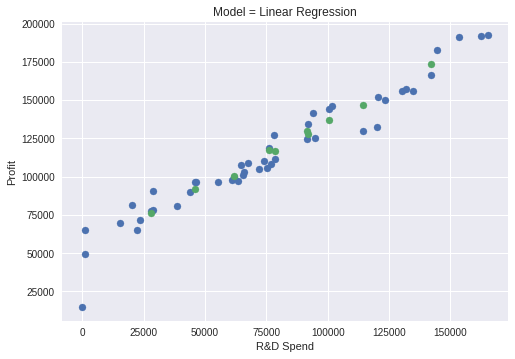

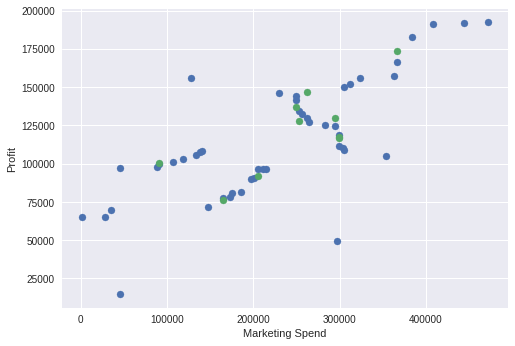

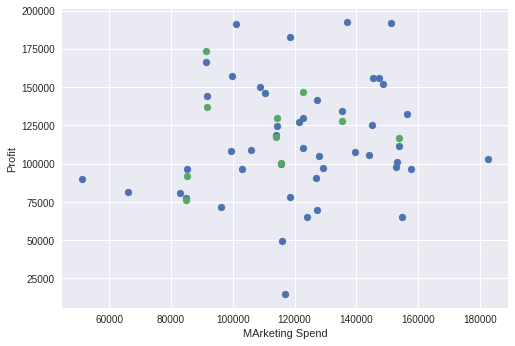

In [ ]:
plotter("Linear Regression")

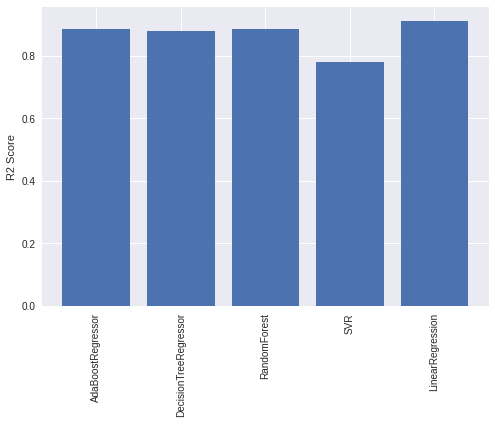

In [ ]:
plt.bar(np.arange(5), [s_AdaBoostRegressor[0], s_DecisionTreeRegressor[0], s_RandomForest[0], s_SVR[0], s_LinearRegression[0]])
plt.xticks(np.arange(5), ["AdaBoostRegressor", "DecisionTreeRegressor", "RandomForest", 'SVR', "LinearRegression"])
plt.xticks(rotation = 90)
plt.ylabel('R2 Score')
plt.show()

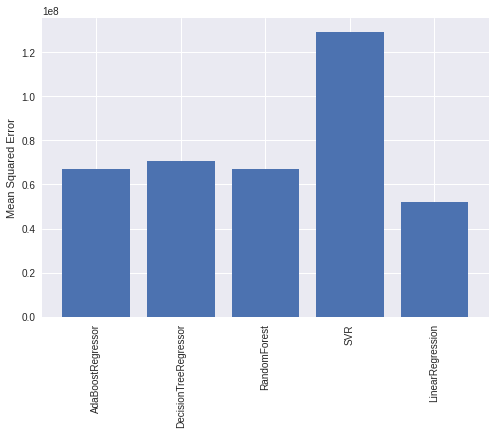

In [ ]:
plt.bar(np.arange(5), [s_AdaBoostRegressor[1], s_DecisionTreeRegressor[1], s_RandomForest[1], s_SVR[1], s_LinearRegression[1]])
plt.xticks(np.arange(5), ["AdaBoostRegressor", "DecisionTreeRegressor", "RandomForest", 'SVR', "LinearRegression"])
plt.xticks(rotation = 90)
plt.ylabel('Mean Squared Error')
plt.show()